# SGA-PMX Demo

Skrypt przedstawia przykładową implementację algorytmu Simple Genetic Algorithm (SGA) z operatorem PMX i jego zastosowanie do rozwiązywania problemu komiwojażera (ang. Travelling Salesman Problem, TSP). Popularne instancje problemu TSP można znaleźć w bibliotece TSPLib [1]. Skrypt skupia się na rozwiązywaniu instancji BERLIN52, w celu rozwiązywania innych instancji może okazać się konieczna zmiana ustawień parametrów algorytmu, a może też i operatorów ewolucyjnych.

Literatura:

[1] TSPLIB, http://comopt.ifi.uni-heidelberg.de/software/TSPLIB95/

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time

from L2.sga import SGA
from L2.mutation import reverse_sequence_mutation, transposition_mutation
from L2.replacement import mu_plus_lambda_replacement
from L2.genetic_operator import pmx

%matplotlib inline

## Input data

In [2]:
# bays29

n = 29
print('Problem size: %d' % n)

coords = np.array([[ 1150.,  1760.],
       [  630.,  1660.],
       [   40.,  2090.],
       [  750.,  1100.],
       [  750.,  2030.],
       [ 1030.,  2070.],
       [ 1650.,   650.],
       [ 1490.,  1630.],
       [  790.,  2260.],
       [  710.,  1310.],
       [  840.,   550.],
       [ 1170.,  2300.],
       [  970.,  1340.],
       [  510.,   700.],
       [  750.,   900.],
       [ 1280.,  1200.],
       [  230.,   590.],
       [  460.,   860.],
       [ 1040.,   950.],
       [  590.,  1390.],
       [  830.,  1770.],
       [  490.,   500.],
       [ 1840.,  1240.],
       [ 1260.,  1500.],
       [ 1280.,   790.],
       [  490.,  2130.],
       [ 1460.,  1420.],
       [ 1260.,  1910.],
       [  360.,  1980.]])

A = np.array([[   0.,  107.,  241.,  190.,  124.,   80.,  316.,   76.,  152.,
         157.,  283.,  133.,  113.,  297.,  228.,  129.,  348.,  276.,
         188.,  150.,   65.,  341.,  184.,   67.,  221.,  169.,  108.,
          45.,  167.],
       [ 107.,    0.,  148.,  137.,   88.,  127.,  336.,  183.,  134.,
          95.,  254.,  180.,  101.,  234.,  175.,  176.,  265.,  199.,
         182.,   67.,   42.,  278.,  271.,  146.,  251.,  105.,  191.,
         139.,   79.],
       [ 241.,  148.,    0.,  374.,  171.,  259.,  509.,  317.,  217.,
         232.,  491.,  312.,  280.,  391.,  412.,  349.,  422.,  356.,
         355.,  204.,  182.,  435.,  417.,  292.,  424.,  116.,  337.,
         273.,   77.],
       [ 190.,  137.,  374.,    0.,  202.,  234.,  222.,  192.,  248.,
          42.,  117.,  287.,   79.,  107.,   38.,  121.,  152.,   86.,
          68.,   70.,  137.,  151.,  239.,  135.,  137.,  242.,  165.,
         228.,  205.],
       [ 124.,   88.,  171.,  202.,    0.,   61.,  392.,  202.,   46.,
         160.,  319.,  112.,  163.,  322.,  240.,  232.,  314.,  287.,
         238.,  155.,   65.,  366.,  300.,  175.,  307.,   57.,  220.,
         121.,   97.],
       [  80.,  127.,  259.,  234.,   61.,    0.,  386.,  141.,   72.,
         167.,  351.,   55.,  157.,  331.,  272.,  226.,  362.,  296.,
         232.,  164.,   85.,  375.,  249.,  147.,  301.,  118.,  188.,
          60.,  185.],
       [ 316.,  336.,  509.,  222.,  392.,  386.,    0.,  233.,  438.,
         254.,  202.,  439.,  235.,  254.,  210.,  187.,  313.,  266.,
         154.,  282.,  321.,  298.,  168.,  249.,   95.,  437.,  190.,
         314.,  435.],
       [  76.,  183.,  317.,  192.,  202.,  141.,  233.,    0.,  213.,
         188.,  272.,  193.,  131.,  302.,  233.,   98.,  344.,  289.,
         177.,  216.,  141.,  346.,  108.,   57.,  190.,  245.,   43.,
          81.,  243.],
       [ 152.,  134.,  217.,  248.,   46.,   72.,  438.,  213.,    0.,
         206.,  365.,   89.,  209.,  368.,  286.,  278.,  360.,  333.,
         284.,  201.,  111.,  412.,  321.,  221.,  353.,   72.,  266.,
         132.,  111.],
       [ 157.,   95.,  232.,   42.,  160.,  167.,  254.,  188.,  206.,
           0.,  159.,  220.,   57.,  149.,   80.,  132.,  193.,  127.,
         100.,   28.,   95.,  193.,  241.,  131.,  169.,  200.,  161.,
         189.,  163.],
       [ 283.,  254.,  491.,  117.,  319.,  351.,  202.,  272.,  365.,
         159.,    0.,  404.,  176.,  106.,   79.,  161.,  165.,  141.,
          95.,  187.,  254.,  103.,  279.,  215.,  117.,  359.,  216.,
         308.,  322.],
       [ 133.,  180.,  312.,  287.,  112.,   55.,  439.,  193.,   89.,
         220.,  404.,    0.,  210.,  384.,  325.,  279.,  415.,  349.,
         285.,  217.,  138.,  428.,  310.,  200.,  354.,  169.,  241.,
         112.,  238.],
       [ 113.,  101.,  280.,   79.,  163.,  157.,  235.,  131.,  209.,
          57.,  176.,  210.,    0.,  186.,  117.,   75.,  231.,  165.,
          81.,   85.,   92.,  230.,  184.,   74.,  150.,  208.,  104.,
         158.,  206.],
       [ 297.,  234.,  391.,  107.,  322.,  331.,  254.,  302.,  368.,
         149.,  106.,  384.,  186.,    0.,   69.,  191.,   59.,   35.,
         125.,  167.,  255.,   44.,  309.,  245.,  169.,  327.,  246.,
         335.,  288.],
       [ 228.,  175.,  412.,   38.,  240.,  272.,  210.,  233.,  286.,
          80.,   79.,  325.,  117.,   69.,    0.,  122.,  122.,   56.,
          56.,  108.,  175.,  113.,  240.,  176.,  125.,  280.,  177.,
         266.,  243.],
       [ 129.,  176.,  349.,  121.,  232.,  226.,  187.,   98.,  278.,
         132.,  161.,  279.,   75.,  191.,  122.,    0.,  244.,  178.,
          66.,  160.,  161.,  235.,  118.,   62.,   92.,  277.,   55.,
         155.,  275.],
       [ 348.,  265.,  422.,  152.,  314.,  362.,  313.,  344.,  360.,
         193.,  165.,  415.,  231.,   59.,  122.,  244.,    0.,   66.,
         178.,  198.,  286.,   77.,  362.,  287.,  228.,  358.,  299.,
         380.,  319.],
       [ 276.,  199.,  356.,   86.,  287.,  296.,  266.,  289.,  333.,
         127.,  141.,  349.,  165.,   35.,   56.,  178.,   66.,    0.,
         112.,  132.,  220.,   79.,  296.,  232.,  181.,  292.,  233.,
         314.,  253.],
       [ 188.,  182.,  355.,   68.,  238.,  232.,  154.,  177.,  284.,
         100.,   95.,  285.,   81.,  125.,   56.,   66.,  178.,  112.,
           0.,  128.,  167.,  169.,  179.,  120.,   69.,  283.,  121.,
         213.,  281.],
       [ 150.,   67.,  204.,   70.,  155.,  164.,  282.,  216.,  201.,
          28.,  187.,  217.,   85.,  167.,  108.,  160.,  198.,  132.,
         128.,    0.,   88.,  211.,  269.,  159.,  197.,  172.,  189.,
         182.,  135.],
       [  65.,   42.,  182.,  137.,   65.,   85.,  321.,  141.,  111.,
          95.,  254.,  138.,   92.,  255.,  175.,  161.,  286.,  220.,
         167.,   88.,    0.,  299.,  229.,  104.,  236.,  110.,  149.,
          97.,  108.],
       [ 341.,  278.,  435.,  151.,  366.,  375.,  298.,  346.,  412.,
         193.,  103.,  428.,  230.,   44.,  113.,  235.,   77.,   79.,
         169.,  211.,  299.,    0.,  353.,  289.,  213.,  371.,  290.,
         379.,  332.],
       [ 184.,  271.,  417.,  239.,  300.,  249.,  168.,  108.,  321.,
         241.,  279.,  310.,  184.,  309.,  240.,  118.,  362.,  296.,
         179.,  269.,  229.,  353.,    0.,  121.,  162.,  345.,   80.,
         189.,  342.],
       [  67.,  146.,  292.,  135.,  175.,  147.,  249.,   57.,  221.,
         131.,  215.,  200.,   74.,  245.,  176.,   62.,  287.,  232.,
         120.,  159.,  104.,  289.,  121.,    0.,  154.,  220.,   41.,
          93.,  218.],
       [ 221.,  251.,  424.,  137.,  307.,  301.,   95.,  190.,  353.,
         169.,  117.,  354.,  150.,  169.,  125.,   92.,  228.,  181.,
          69.,  197.,  236.,  213.,  162.,  154.,    0.,  352.,  147.,
         247.,  350.],
       [ 169.,  105.,  116.,  242.,   57.,  118.,  437.,  245.,   72.,
         200.,  359.,  169.,  208.,  327.,  280.,  277.,  358.,  292.,
         283.,  172.,  110.,  371.,  345.,  220.,  352.,    0.,  265.,
         178.,   39.],
       [ 108.,  191.,  337.,  165.,  220.,  188.,  190.,   43.,  266.,
         161.,  216.,  241.,  104.,  246.,  177.,   55.,  299.,  233.,
         121.,  189.,  149.,  290.,   80.,   41.,  147.,  265.,    0.,
         124.,  263.],
       [  45.,  139.,  273.,  228.,  121.,   60.,  314.,   81.,  132.,
         189.,  308.,  112.,  158.,  335.,  266.,  155.,  380.,  314.,
         213.,  182.,   97.,  379.,  189.,   93.,  247.,  178.,  124.,
           0.,  199.],
       [ 167.,   79.,   77.,  205.,   97.,  185.,  435.,  243.,  111.,
         163.,  322.,  238.,  206.,  288.,  243.,  275.,  319.,  253.,
         281.,  135.,  108.,  332.,  342.,  218.,  350.,   39.,  263.,
         199.,    0.]])
print('Distance matrix:\n', A)

# p = [0, 48, 31, 44, 18, 40,  7,  8,  9, 42, 32, 50, 10, 51, 13, 12, 46, 25, 26, 27, 11, 24,  3,  5, 14,  4, 23, 47, 37, 36, 39, 38, 35, 34, 33, 43, 45, 15, 28, 49, 19, 22, 29,  1,  6, 41, 20, 16,  2, 17, 30, 21]
# print('Optimal solution:\n', p)

Problem size: 29
Distance matrix:
 [[   0.  107.  241.  190.  124.   80.  316.   76.  152.  157.  283.  133.
   113.  297.  228.  129.  348.  276.  188.  150.   65.  341.  184.   67.
   221.  169.  108.   45.  167.]
 [ 107.    0.  148.  137.   88.  127.  336.  183.  134.   95.  254.  180.
   101.  234.  175.  176.  265.  199.  182.   67.   42.  278.  271.  146.
   251.  105.  191.  139.   79.]
 [ 241.  148.    0.  374.  171.  259.  509.  317.  217.  232.  491.  312.
   280.  391.  412.  349.  422.  356.  355.  204.  182.  435.  417.  292.
   424.  116.  337.  273.   77.]
 [ 190.  137.  374.    0.  202.  234.  222.  192.  248.   42.  117.  287.
    79.  107.   38.  121.  152.   86.   68.   70.  137.  151.  239.  135.
   137.  242.  165.  228.  205.]
 [ 124.   88.  171.  202.    0.   61.  392.  202.   46.  160.  319.  112.
   163.  322.  240.  232.  314.  287.  238.  155.   65.  366.  300.  175.
   307.   57.  220.  121.   97.]
 [  80.  127.  259.  234.   61.    0.  386.  141.   72.  167

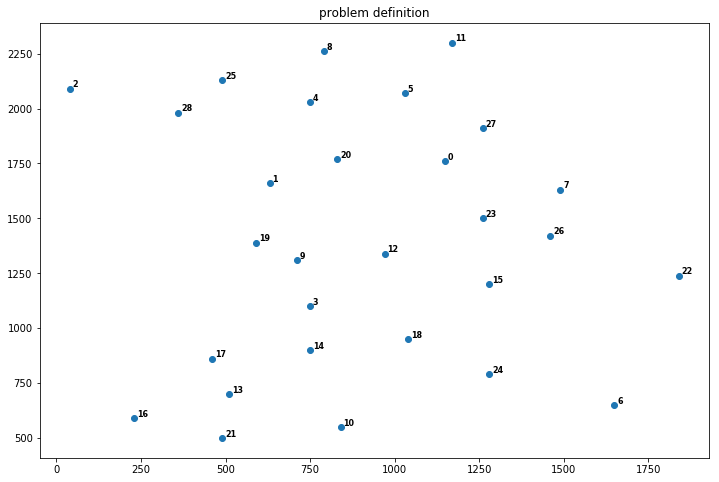

In [4]:
plt.figure(figsize=(12,8))

plt.plot(coords[:, 0], coords[:, 1], 'o')

for i in range(n):
    plt.text(coords[i, 0]+8, coords[i, 1]+8, str(i), fontdict={'weight':'bold', 'size':8})

plt.title('problem definition')

plt.show()

## Objective function

In [5]:
def tsp_objective_function(p):
    s = 0.0
    for i in range(n):
        s += A[p[i-1], p[i]]
    return s

## SGA-PMX

In [9]:
sga_pmx = SGA(tsp_objective_function, chromosome_length=n, 
              mutation=reverse_sequence_mutation,
              replacement=mu_plus_lambda_replacement,
              genetic_operator=pmx)

In [10]:
sga_pmx.evolve(population_size=50,
               number_of_iterations=250,
               crossover_probability=0.95,
               mutation_probability=0.35)

  0     0.01078153 5102.00000000 5548.96000000 5828.00000000 189.09870015
  1     0.01494122 5102.00000000 5392.04000000 5575.00000000 117.15373831
  2     0.01940084 4674.00000000 5235.78000000 5395.00000000 143.87707114
  3     0.02373505 4554.00000000 5090.56000000 5257.00000000 173.49168971
  4     0.02836585 4522.00000000 4926.64000000 5169.00000000 168.39296422
  5     0.03284883 3911.00000000 4744.78000000 4948.00000000 185.19722352
  6     0.03731155 3911.00000000 4556.34000000 4805.00000000 237.94937361
  7     0.04142213 3911.00000000 4292.12000000 4594.00000000 226.49870993
  8     0.04547524 3788.00000000 4072.66000000 4269.00000000 129.00955158
  9     0.04911327 3788.00000000 3948.48000000 4043.00000000  71.07664595
 10     0.05302262 3637.00000000 3878.48000000 3944.00000000  59.49159268
 11     0.05676699 3637.00000000 3835.04000000 3911.00000000  62.60126516
 12     0.06042933 3624.00000000 3767.86000000 3857.00000000  53.18646820
 13     0.06424952 3561.00000000 3731.

116     0.42017126 2132.00000000 2132.00000000 2132.00000000   0.00000000
117     0.42359734 2132.00000000 2132.00000000 2132.00000000   0.00000000
118     0.42703962 2132.00000000 2132.00000000 2132.00000000   0.00000000
119     0.43059444 2132.00000000 2132.00000000 2132.00000000   0.00000000
120     0.43374157 2132.00000000 2132.00000000 2132.00000000   0.00000000
121     0.43692708 2132.00000000 2132.00000000 2132.00000000   0.00000000
122     0.44009566 2132.00000000 2132.00000000 2132.00000000   0.00000000
123     0.44331956 2132.00000000 2132.00000000 2132.00000000   0.00000000
124     0.44656849 2132.00000000 2132.00000000 2132.00000000   0.00000000
125     0.44982791 2132.00000000 2132.00000000 2132.00000000   0.00000000
126     0.45291328 2132.00000000 2132.00000000 2132.00000000   0.00000000
127     0.45647621 2132.00000000 2132.00000000 2132.00000000   0.00000000
128     0.45979977 2132.00000000 2132.00000000 2132.00000000   0.00000000
129     0.46298289 2112.00000000 2131.

238     0.82634926 2110.00000000 2110.00000000 2110.00000000   0.00000000
239     0.83113241 2110.00000000 2110.00000000 2110.00000000   0.00000000
240     0.83472037 2110.00000000 2110.00000000 2110.00000000   0.00000000
241     0.83804560 2110.00000000 2110.00000000 2110.00000000   0.00000000
242     0.84119248 2110.00000000 2110.00000000 2110.00000000   0.00000000
243     0.84480810 2110.00000000 2110.00000000 2110.00000000   0.00000000
244     0.84812164 2110.00000000 2110.00000000 2110.00000000   0.00000000
245     0.85156798 2110.00000000 2110.00000000 2110.00000000   0.00000000
246     0.85466790 2110.00000000 2110.00000000 2110.00000000   0.00000000
247     0.85784745 2110.00000000 2110.00000000 2110.00000000   0.00000000
248     0.86130047 2110.00000000 2110.00000000 2110.00000000   0.00000000
249     0.86468887 2110.00000000 2110.00000000 2110.00000000   0.00000000


(array([ 5102.,  5102.,  4674.,  4554.,  4522.,  3911.,  3911.,  3911.,
         3788.,  3788.,  3637.,  3637.,  3624.,  3561.,  3561.,  3561.,
         3560.,  3319.,  3124.,  3124.,  3124.,  3124.,  3124.,  3060.,
         2977.,  2810.,  2727.,  2717.,  2687.,  2672.,  2662.,  2579.,
         2579.,  2521.,  2487.,  2487.,  2449.,  2449.,  2449.,  2410.,
         2410.,  2410.,  2400.,  2398.,  2398.,  2362.,  2362.,  2362.,
         2362.,  2360.,  2360.,  2360.,  2360.,  2360.,  2322.,  2268.,
         2268.,  2268.,  2268.,  2268.,  2268.,  2268.,  2268.,  2201.,
         2201.,  2201.,  2201.,  2201.,  2201.,  2188.,  2188.,  2188.,
         2188.,  2188.,  2188.,  2188.,  2188.,  2188.,  2137.,  2137.,
         2137.,  2137.,  2137.,  2137.,  2137.,  2137.,  2137.,  2137.,
         2137.,  2137.,  2137.,  2137.,  2137.,  2137.,  2137.,  2137.,
         2137.,  2137.,  2132.,  2132.,  2132.,  2132.,  2132.,  2132.,
         2132.,  2132.,  2132.,  2132.,  2132.,  2132.,  2132., 

In [11]:
sga_pmx.evolve(population_size=50,
               number_of_iterations=250,
               crossover_probability=0.95,
               mutation_probability=0.35)

  0     0.00812626 4686.00000000 5489.42000000 5891.00000000 282.92543823
  1     0.01242995 4592.00000000 5184.10000000 5505.00000000 254.50377207
  2     0.01668811 4592.00000000 4938.10000000 5237.00000000 165.45878641
  3     0.02082753 4301.00000000 4791.76000000 4966.00000000 139.89432583
  4     0.02499270 4267.00000000 4648.60000000 4821.00000000 136.64450227
  5     0.02920818 3889.00000000 4494.76000000 4686.00000000 157.59677154
  6     0.03333116 3889.00000000 4356.20000000 4555.00000000 168.68645470
  7     0.03732491 3807.00000000 4203.44000000 4427.00000000 152.27687415
  8     0.04102707 3770.00000000 4082.04000000 4238.00000000 115.25067635
  9     0.04492450 3770.00000000 3979.76000000 4127.00000000 103.99491526
 10     0.04849720 3447.00000000 3864.04000000 3969.00000000  77.30561687
 11     0.05246687 3445.00000000 3812.04000000 3889.00000000  97.53747177
 12     0.05607486 3408.00000000 3708.40000000 3810.00000000 141.20552397
 13     0.05996680 3333.00000000 3555.

114     0.41088557 2128.00000000 2128.64000000 2130.00000000   0.93295230
115     0.41554284 2128.00000000 2128.00000000 2128.00000000   0.00000000
116     0.41871667 2074.00000000 2126.92000000 2128.00000000   7.56000000
117     0.42222595 2074.00000000 2085.88000000 2128.00000000  22.36930039
118     0.42552257 2074.00000000 2074.00000000 2074.00000000   0.00000000
119     0.42901206 2074.00000000 2074.00000000 2074.00000000   0.00000000
120     0.43225789 2074.00000000 2074.00000000 2074.00000000   0.00000000
121     0.43578005 2074.00000000 2074.00000000 2074.00000000   0.00000000
122     0.43905330 2074.00000000 2074.00000000 2074.00000000   0.00000000
123     0.44217277 2074.00000000 2074.00000000 2074.00000000   0.00000000
124     0.44546628 2074.00000000 2074.00000000 2074.00000000   0.00000000
125     0.44920087 2074.00000000 2074.00000000 2074.00000000   0.00000000
126     0.45246196 2074.00000000 2074.00000000 2074.00000000   0.00000000
127     0.45575690 2074.00000000 2074.

233     0.81693697 2074.00000000 2074.00000000 2074.00000000   0.00000000
234     0.82087755 2074.00000000 2074.00000000 2074.00000000   0.00000000
235     0.82412434 2074.00000000 2074.00000000 2074.00000000   0.00000000
236     0.82775307 2074.00000000 2074.00000000 2074.00000000   0.00000000
237     0.83138442 2074.00000000 2074.00000000 2074.00000000   0.00000000
238     0.83484459 2074.00000000 2074.00000000 2074.00000000   0.00000000
239     0.83817720 2074.00000000 2074.00000000 2074.00000000   0.00000000
240     0.84153676 2074.00000000 2074.00000000 2074.00000000   0.00000000
241     0.84465981 2074.00000000 2074.00000000 2074.00000000   0.00000000
242     0.84787488 2074.00000000 2074.00000000 2074.00000000   0.00000000
243     0.85136580 2074.00000000 2074.00000000 2074.00000000   0.00000000
244     0.85482121 2074.00000000 2074.00000000 2074.00000000   0.00000000
245     0.85821009 2074.00000000 2074.00000000 2074.00000000   0.00000000
246     0.86133003 2074.00000000 2074.

(array([ 4686.,  4592.,  4592.,  4301.,  4267.,  3889.,  3889.,  3807.,
         3770.,  3770.,  3447.,  3445.,  3408.,  3333.,  3333.,  3156.,
         2845.,  2845.,  2845.,  2720.,  2720.,  2720.,  2720.,  2678.,
         2586.,  2586.,  2578.,  2556.,  2556.,  2446.,  2408.,  2408.,
         2306.,  2306.,  2222.,  2222.,  2222.,  2181.,  2181.,  2170.,
         2170.,  2170.,  2170.,  2170.,  2170.,  2170.,  2170.,  2170.,
         2167.,  2167.,  2167.,  2167.,  2167.,  2167.,  2167.,  2167.,
         2167.,  2167.,  2167.,  2167.,  2167.,  2167.,  2167.,  2167.,
         2167.,  2167.,  2154.,  2154.,  2154.,  2154.,  2154.,  2154.,
         2154.,  2154.,  2154.,  2154.,  2154.,  2154.,  2154.,  2154.,
         2154.,  2154.,  2154.,  2154.,  2154.,  2154.,  2154.,  2154.,
         2154.,  2154.,  2151.,  2151.,  2151.,  2151.,  2151.,  2151.,
         2151.,  2151.,  2151.,  2151.,  2151.,  2151.,  2151.,  2151.,
         2151.,  2151.,  2151.,  2151.,  2151.,  2131.,  2130., 

In [12]:
sga_pmx.evolve(population_size=50,
               number_of_iterations=250,
               crossover_probability=0.95,
               mutation_probability=0.35)

  0     0.00801110 4982.00000000 5610.30000000 5913.00000000 215.87804428
  1     0.01251936 4982.00000000 5396.22000000 5648.00000000 152.37195149
  2     0.01655936 4854.00000000 5240.86000000 5417.00000000 140.09311332
  3     0.02083874 4767.00000000 5107.24000000 5291.00000000 135.16191179
  4     0.02516222 4556.00000000 4956.70000000 5126.00000000 132.64497729
  5     0.02956390 4349.00000000 4795.72000000 4969.00000000 151.37477201
  6     0.03399372 4349.00000000 4669.56000000 4890.00000000 157.14008527
  7     0.03803062 4257.00000000 4545.44000000 4722.00000000 123.05968633
  8     0.04227829 4209.00000000 4453.12000000 4576.00000000 103.78624957
  9     0.04683900 4089.00000000 4378.96000000 4502.00000000  93.68371470
 10     0.05075073 4037.00000000 4289.18000000 4397.00000000  95.11670516
 11     0.05491638 4012.00000000 4198.58000000 4336.00000000  87.14702290
 12     0.05914569 3826.00000000 4127.82000000 4267.00000000  99.81536755
 13     0.06337881 3826.00000000 4083.

132     0.48611498 2132.00000000 2132.00000000 2132.00000000   0.00000000
133     0.49024153 2132.00000000 2132.00000000 2132.00000000   0.00000000
134     0.49340510 2132.00000000 2132.00000000 2132.00000000   0.00000000
135     0.49677444 2132.00000000 2132.00000000 2132.00000000   0.00000000
136     0.49979520 2132.00000000 2132.00000000 2132.00000000   0.00000000
137     0.50339603 2132.00000000 2132.00000000 2132.00000000   0.00000000
138     0.50692272 2132.00000000 2132.00000000 2132.00000000   0.00000000
139     0.51004577 2132.00000000 2132.00000000 2132.00000000   0.00000000
140     0.51357555 2132.00000000 2132.00000000 2132.00000000   0.00000000
141     0.51686883 2132.00000000 2132.00000000 2132.00000000   0.00000000
142     0.52021861 2132.00000000 2132.00000000 2132.00000000   0.00000000
143     0.52338362 2132.00000000 2132.00000000 2132.00000000   0.00000000
144     0.52690697 2132.00000000 2132.00000000 2132.00000000   0.00000000
145     0.53041101 2132.00000000 2132.

(array([ 4982.,  4982.,  4854.,  4767.,  4556.,  4349.,  4349.,  4257.,
         4209.,  4089.,  4037.,  4012.,  3826.,  3826.,  3568.,  3558.,
         3411.,  3411.,  3411.,  3385.,  3302.,  3299.,  3238.,  3209.,
         3146.,  3086.,  3086.,  3086.,  3061.,  2889.,  2884.,  2884.,
         2756.,  2756.,  2756.,  2661.,  2659.,  2659.,  2659.,  2652.,
         2652.,  2617.,  2617.,  2617.,  2530.,  2416.,  2416.,  2405.,
         2405.,  2405.,  2405.,  2405.,  2405.,  2405.,  2405.,  2405.,
         2384.,  2384.,  2384.,  2384.,  2384.,  2310.,  2310.,  2310.,
         2310.,  2310.,  2310.,  2310.,  2310.,  2310.,  2310.,  2310.,
         2310.,  2310.,  2310.,  2310.,  2290.,  2290.,  2290.,  2290.,
         2234.,  2234.,  2234.,  2234.,  2169.,  2169.,  2169.,  2169.,
         2169.,  2169.,  2169.,  2169.,  2169.,  2169.,  2169.,  2169.,
         2169.,  2169.,  2169.,  2169.,  2169.,  2169.,  2169.,  2169.,
         2169.,  2169.,  2169.,  2169.,  2169.,  2169.,  2169., 

In [13]:
best, best_chromosome = sga_pmx.evolve(population_size=50,
                                       number_of_iterations=250,
                                       crossover_probability=0.95,
                                       mutation_probability=0.35)

  0     0.00824857 4727.00000000 5539.14000000 5882.00000000 293.21050527
  1     0.01304221 4311.00000000 5161.74000000 5534.00000000 277.61439516
  2     0.01732206 4311.00000000 4889.74000000 5194.00000000 190.89984914
  3     0.02209997 4279.00000000 4776.34000000 4960.00000000 166.70916112
  4     0.02648807 3985.00000000 4555.34000000 4786.00000000 202.38612699
  5     0.03059387 3893.00000000 4326.58000000 4593.00000000 181.86875378
  6     0.03439188 3853.00000000 4175.14000000 4337.00000000 113.08174212
  7     0.03831124 3783.00000000 4058.50000000 4139.00000000  78.32630465
  8     0.04215193 3692.00000000 3988.54000000 4078.00000000  89.17201579
  9     0.04663849 3692.00000000 3916.18000000 4035.00000000  88.36100724
 10     0.05062842 3575.00000000 3846.04000000 3928.00000000  70.30560717
 11     0.05469322 3575.00000000 3790.44000000 3875.00000000  62.01456603
 12     0.05853295 3575.00000000 3731.72000000 3798.00000000  64.39069498
 13     0.06241655 3436.00000000 3666.

116     0.41553807 2033.00000000 2033.00000000 2033.00000000   0.00000000
117     0.41949749 2033.00000000 2033.00000000 2033.00000000   0.00000000
118     0.42275453 2033.00000000 2033.00000000 2033.00000000   0.00000000
119     0.42601323 2033.00000000 2033.00000000 2033.00000000   0.00000000
120     0.42952275 2033.00000000 2033.00000000 2033.00000000   0.00000000
121     0.43296504 2033.00000000 2033.00000000 2033.00000000   0.00000000
122     0.43639350 2033.00000000 2033.00000000 2033.00000000   0.00000000
123     0.43984914 2033.00000000 2033.00000000 2033.00000000   0.00000000
124     0.44355941 2033.00000000 2033.00000000 2033.00000000   0.00000000
125     0.44659948 2033.00000000 2033.00000000 2033.00000000   0.00000000
126     0.44999647 2033.00000000 2033.00000000 2033.00000000   0.00000000
127     0.45349240 2033.00000000 2033.00000000 2033.00000000   0.00000000
128     0.45716405 2033.00000000 2033.00000000 2033.00000000   0.00000000
129     0.46059680 2033.00000000 2033.

236     0.82297182 2033.00000000 2033.00000000 2033.00000000   0.00000000
237     0.82661676 2033.00000000 2033.00000000 2033.00000000   0.00000000
238     0.83009911 2033.00000000 2033.00000000 2033.00000000   0.00000000
239     0.83350420 2033.00000000 2033.00000000 2033.00000000   0.00000000
240     0.83721876 2033.00000000 2033.00000000 2033.00000000   0.00000000
241     0.84063530 2033.00000000 2033.00000000 2033.00000000   0.00000000
242     0.84391284 2033.00000000 2033.00000000 2033.00000000   0.00000000
243     0.84732699 2033.00000000 2033.00000000 2033.00000000   0.00000000
244     0.85027337 2033.00000000 2033.00000000 2033.00000000   0.00000000
245     0.85354710 2033.00000000 2033.00000000 2033.00000000   0.00000000
246     0.85669637 2033.00000000 2033.00000000 2033.00000000   0.00000000
247     0.86032009 2033.00000000 2033.00000000 2033.00000000   0.00000000
248     0.86362743 2033.00000000 2033.00000000 2033.00000000   0.00000000
249     0.86670709 2033.00000000 2033.

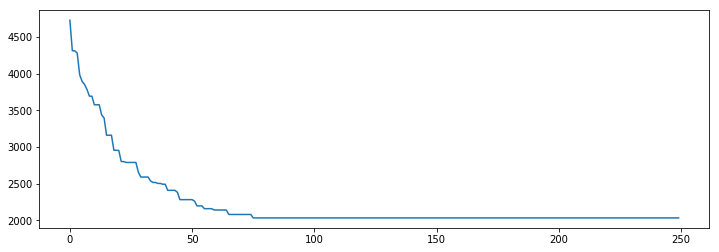

In [14]:
plt.figure(figsize=(12,4))
plt.plot(best)
plt.show()

In [186]:
best

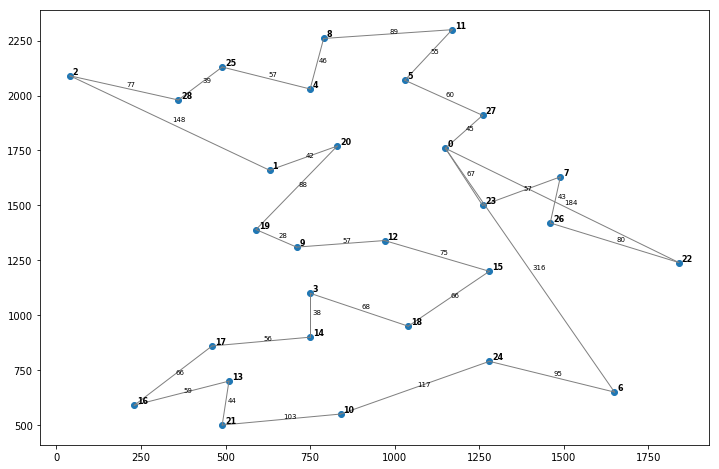

In [15]:
from matplotlib.lines import Line2D

route = best_chromosome
coords = coords.astype("int")

plt.figure(figsize=(12,8))
fig, ax = plt.subplots(figsize=(12,8))

plt.plot(coords[:, 0], coords[:, 1], 'o')

for i in range(n):
    plt.text(coords[i, 0]+8, coords[i, 1]+8, str(i), fontdict={'weight':'bold', 'size':8})

ax.add_line(Line2D(
    [coords[0, 0], coords[route[0], 0]],
    [coords[0, 1], coords[route[0], 1]],
    linewidth=1, color='gray'))
plt.text((coords[0, 0] + coords[route[0], 0])/2 + 6,
         (coords[0, 1] + coords[route[0], 1])/2 + 6,
         '%d' % A[0, route[0]], fontdict={'weight':'normal', 'size':7})
for i in range(1, len(route)):
    ax.add_line(Line2D(
        [coords[route[i-1], 0], coords[route[i], 0]],
        [coords[route[i-1], 1], coords[route[i], 1]],
        linewidth=1, color='gray'))
    plt.text((coords[route[i-1], 0] + coords[route[i], 0])/2 + 6,
             (coords[route[i-1], 1] + coords[route[i], 1])/2 + 6,
             '%d' % A[route[i-1], route[i]], fontdict={'weight':'normal', 'size':7})
ax.add_line(Line2D(
    [coords[route[-1], 0], coords[0, 0]],
    [coords[route[-1], 1], coords[0, 1]],
    linewidth=1, color='gray'))
plt.text((coords[route[-1], 0] + coords[0, 0])/2 + 6,
         (coords[route[-1], 1] + coords[0, 1])/2 + 6,
         '%d' % A[route[-1], 0], fontdict={'weight':'normal', 'size':7})


plt.show()

In [25]:
coords[0, 0]

1150.0

In [29]:
route

array([[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.]])

In [35]:
best_chromosome

array([23, 12,  3,  9, 19,  1, 28,  2, 25,  8,  4, 20,  5, 11, 27,  0,  7,
       26, 22,  6, 24, 10, 21, 16, 13, 17, 14, 18, 15])

In [16]:
opt = np.array([1,
1,
28,
6,
12,
9,
5,
26,
29,
3,
2,
20,
10,
4,
15,
18,
17,
14,
22,
11,
19,
25,
7,
23,
27,
8,
24,
16,
13,
21]) - 1

In [38]:
len(opt)

29

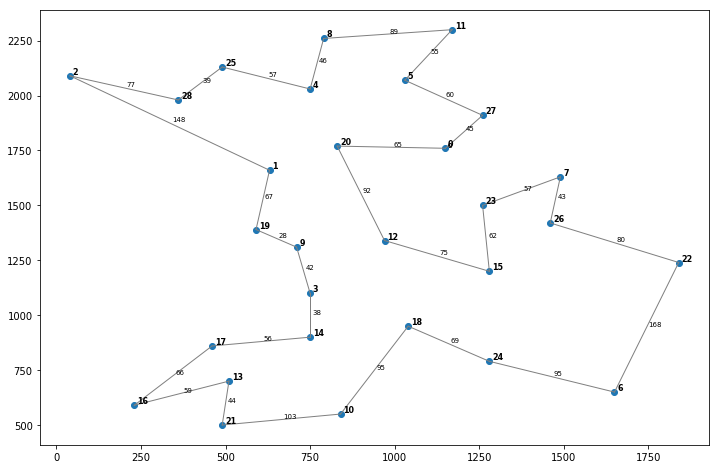

In [17]:
from matplotlib.lines import Line2D

route = opt
coords = coords.astype("int")

plt.figure(figsize=(12,8))
fig, ax = plt.subplots(figsize=(12,8))

plt.plot(coords[:, 0], coords[:, 1], 'o')

for i in range(n):
    plt.text(coords[i, 0]+8, coords[i, 1]+8, str(i), fontdict={'weight':'bold', 'size':8})

ax.add_line(Line2D(
    [coords[0, 0], coords[route[0], 0]],
    [coords[0, 1], coords[route[0], 1]],
    linewidth=1, color='gray'))
plt.text((coords[0, 0] + coords[route[0], 0])/2 + 6,
         (coords[0, 1] + coords[route[0], 1])/2 + 6,
         '%d' % A[0, route[0]], fontdict={'weight':'normal', 'size':7})
for i in range(1, len(route)):
    ax.add_line(Line2D(
        [coords[route[i-1], 0], coords[route[i], 0]],
        [coords[route[i-1], 1], coords[route[i], 1]],
        linewidth=1, color='gray'))
    plt.text((coords[route[i-1], 0] + coords[route[i], 0])/2 + 6,
             (coords[route[i-1], 1] + coords[route[i], 1])/2 + 6,
             '%d' % A[route[i-1], route[i]], fontdict={'weight':'normal', 'size':7})
ax.add_line(Line2D(
    [coords[route[-1], 0], coords[0, 0]],
    [coords[route[-1], 1], coords[0, 1]],
    linewidth=1, color='gray'))
plt.text((coords[route[-1], 0] + coords[0, 0])/2 + 6,
         (coords[route[-1], 1] + coords[0, 1])/2 + 6,
         '%d' % A[route[-1], 0], fontdict={'weight':'normal', 'size':7})


plt.show()

In [42]:
tsp_objective_function(opt)

9074.1480478728427